In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from pylab import rcParams
from skimpy import clean_columns

rcParams["figure.figsize"] = (12,12)
%matplotlib inline

sns.set()

In [3]:
# Load data
fert = pd.read_csv("pcos_fertility.csv")
infert = pd.read_excel("pcos_no_infertility.xlsx", sheet_name="Full_new")

In [4]:
fert.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [5]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


In [6]:
infert.head().T

,0,1,2,3,4
Sl. No,1,2,3,4,5
Patient File No.,1,2,3,4,5
PCOS (Y/N),0,0,1,0,0
Age (yrs),28,36,33,37,25
Weight (Kg),44.6,65.0,68.8,65.0,52.0
Height(Cm),152.0,161.5,165.0,148.0,161.0
BMI,19.3,24.921163,25.270891,29.674945,20.060954
Blood Group,15,15,11,13,11
Pulse rate(bpm),78,74,72,72,72
RR (breaths/min),22,20,18,20,18


In [7]:
infert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [8]:
pcos = infert.merge(fert, on="Sl. No",suffixes=("_x","_y"), how="left")
pcos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sl. No                    541 non-null    int64  
 1   Patient File No._x        541 non-null    int64  
 2   PCOS (Y/N)_x              541 non-null    int64  
 3    Age (yrs)                541 non-null    int64  
 4   Weight (Kg)               541 non-null    float64
 5   Height(Cm)                541 non-null    float64
 6   BMI                       541 non-null    float64
 7   Blood Group               541 non-null    int64  
 8   Pulse rate(bpm)           541 non-null    int64  
 9   RR (breaths/min)          541 non-null    int64  
 10  Hb(g/dl)                  541 non-null    float64
 11  Cycle(R/I)                541 non-null    int64  
 12  Cycle length(days)        541 non-null    int64  
 13  Marraige Status (Yrs)     540 non-null    float64
 14  Pregnant(Y

In [9]:
#column name clean up
pcos_clean = clean_columns(pcos)


50 column names have been cleaned

In [10]:
[x for x in pcos_clean.columns if pcos_clean[x].isnull().sum() > 0]

['marraige_status_yrs', 'fast_food_y_n', 'unnamed_44']

In [11]:
pd.DataFrame({"Null": pcos_clean.isnull().sum(), "%Null" : (pcos_clean.isnull().sum()/pcos_clean.shape[0])*100})

,Null,%Null
sl_no,0,0.000000
patient_file_no_x,0,0.000000
pcos_y_n_x,0,0.000000
age_yrs,0,0.000000
weight_kg,0,0.000000
height_cm,0,0.000000
bmi,0,0.000000
blood_group,0,0.000000
pulse_rate_bpm,0,0.000000
rr_breaths_min,0,0.000000


In [12]:
# remove columns where we have more than 90% of missing values
pcos_clean.drop("unnamed_44", axis=1, inplace=True)

In [13]:
# pcos_clean["pcos_y_n_x"].equals(pcos_clean["pcos_y_n_y"])

def equal_cols(col_1, col_2):
    if pcos_clean[col_1].equals(pcos_clean[col_2]):
        return (f"{col_1} and {col_2} are equal")
    else:
        return f"{col_1} and {col_2} are not equal"    

print(equal_cols("pcos_y_n_x","pcos_y_n_y"))
print(equal_cols("i_beta_hcg_m_iu_m_l_x","i_beta_hcg_m_iu_m_l_y"))
print(equal_cols("ii_beta_hcg_m_iu_m_l_x","ii_beta_hcg_m_iu_m_l_y"))
print(equal_cols("amh_ng_m_l_x","amh_ng_m_l_y"))


pcos_y_n_x and pcos_y_n_y are equal
i_beta_hcg_m_iu_m_l_x and i_beta_hcg_m_iu_m_l_y are equal
ii_beta_hcg_m_iu_m_l_x and ii_beta_hcg_m_iu_m_l_y are not equal
amh_ng_m_l_x and amh_ng_m_l_y are not equal


In [14]:
# removing columns that are equal as well as those from the y-dataset
pcos_clean.drop(["pcos_y_n_y","i_beta_hcg_m_iu_m_l_y","patient_file_no_y","ii_beta_hcg_m_iu_m_l_y",
                "amh_ng_m_l_y","patient_file_no_x"], axis = 1, inplace=True)

In [15]:
#address missing values


In [16]:
for col in ["marraige_status_yrs","fast_food_y_n"]:
    pcos_clean[col].fillna(pcos_clean[col].mode()[0], inplace = True)

In [17]:
pcos_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,541.0,271.000000,156.317519,1.000000,136.000000,271.000000,406.000000,541.000000
pcos_y_n_x,541.0,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
age_yrs,541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
weight_kg,541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
height_cm,541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
bmi,541.0,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
blood_group,541.0,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
pulse_rate_bpm,541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
rr_breaths_min,541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000
hb_g_dl,541.0,11.160037,0.866904,8.500000,10.500000,11.000000,11.700000,14.800000


In [18]:
pcos_clean["cycle_r_i"].value_counts()

pcos_clean["cycle_r_i"].replace(5, 4, inplace=True)

In [19]:
pcos_clean.columns

Index(['sl_no', 'pcos_y_n_x', 'age_yrs', 'weight_kg', 'height_cm', 'bmi',
       'blood_group', 'pulse_rate_bpm', 'rr_breaths_min', 'hb_g_dl',
       'cycle_r_i', 'cycle_length_days', 'marraige_status_yrs', 'pregnant_y_n',
       'no_of_aborptions', 'i_beta_hcg_m_iu_m_l_x', 'ii_beta_hcg_m_iu_m_l_x',
       'fsh_m_iu_m_l', 'lh_m_iu_m_l', 'fsh_lh', 'hip_inch', 'waist_inch',
       'waist_hip_ratio', 'tsh_m_iu_l', 'amh_ng_m_l_x', 'prl_ng_m_l',
       'vit_d_3_ng_m_l', 'prg_ng_m_l', 'rbs_mg_dl', 'weight_gain_y_n',
       'hair_growth_y_n', 'skin_darkening_y_n', 'hair_loss_y_n', 'pimples_y_n',
       'fast_food_y_n', 'reg_exercise_y_n', 'bp_systolic_mm_hg',
       'bp_diastolic_mm_hg', 'follicle_no_l', 'follicle_no_r',
       'avg_f_size_l_mm', 'avg_f_size_r_mm', 'endometrium_mm'],
      dtype='object')

In [20]:
# convert to category
cat_cols = ['pcos_y_n_x','blood_group','cycle_r_i','pregnant_y_n','weight_gain_y_n',
       'hair_growth_y_n', 'skin_darkening_y_n', 'hair_loss_y_n', 'pimples_y_n','fast_food_y_n', 'reg_exercise_y_n']

for col in cat_cols:
    pcos_clean[col] = pcos_clean[col].astype("category")


# #converty to float
# for col in ["ii_beta_hcg_m_iu_m_l_x", "amh_ng_m_l_x"]:
#     col_c = col[1].replace('"', "").strip()
# #     pcos_clean[col] = pcos_clean[col].astype("float")

# col["ii_beta_hcg_m_iu_m_l_x"] = col["ii_beta_hcg_m_iu_m_l_x"].astype("float")



In [21]:
pcos_clean["ii_beta_hcg_m_iu_m_l_x"]

0        1.99
1        1.99
2      494.08
3        1.99
4      801.45
        ...  
536      1.99
537      1.99
538      1.99
539      1.99
540      1.99
Name: ii_beta_hcg_m_iu_m_l_x, Length: 541, dtype: object

### EDA

Questions to Answer

What are the factors associated with PCOS?

* Lifestyle - Exercise, Fast Foods and BMI.
* Secondary - Hip to waist ration, regular cycles and cycle lenght, hirsuitism and acne, Weight gain, Blood Pressure.
* Primary - No of follicles and follicle size, FSH and  LH, HCG Levels(Human Chronic Gonadritophic),TSH(Thyroid Stimulating Hormone),AMH(Anti Mullerina Hormone),High Prolactin, Random Blood Sugar(RBS)

* Hypo or Hyperthyroidism can affect both FSH,lh and Prolactin, Affect Insulin Sensitivity

* There are Primary and Secondary syptoms that are used to diagnose patients with PCOS. I will explore the primary and secondary syptoms as well as the lifestyle of patients in this study

In [22]:
#lifestyle
lstly =  pcos_clean[["fast_food_y_n","reg_exercise_y_n","pcos_y_n_x","bmi","age_yrs"]]

#primary
sec_stmp = pcos_clean[['cycle_r_i', 'cycle_length_days','pregnant_y_n','waist_hip_ratio','hair_growth_y_n',
           'skin_darkening_y_n', 'hair_loss_y_n', 'pimples_y_n','pcos_y_n_x']]

#secondary
prmy_stmp = pcos_clean[['blood_group','i_beta_hcg_m_iu_m_l_x', 'ii_beta_hcg_m_iu_m_l_x','fsh_lh','tsh_m_iu_l', 'amh_ng_m_l_x', 'prl_ng_m_l',
                            'vit_d_3_ng_m_l', 'prg_ng_m_l', 'rbs_mg_dl','bp_systolic_mm_hg','bp_diastolic_mm_hg', 'follicle_no_l',
                             'follicle_no_r','avg_f_size_l_mm', 'avg_f_size_r_mm', 'endometrium_mm','pcos_y_n_x']]

                      

##### Lifestyle

In [23]:
lstly.columns

Index(['fast_food_y_n', 'reg_exercise_y_n', 'pcos_y_n_x', 'bmi', 'age_yrs'], dtype='object')

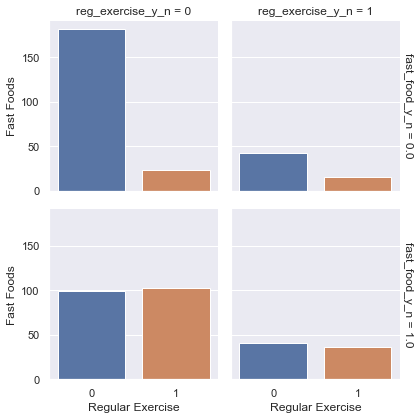

In [24]:
#lstly.groupby(["fast_food_y_n","reg_exercise_y_n","pcos_y_n_x"], as_index=False).size().sort_values(by = "size",ascending = False)

g1 = sns.FacetGrid(lstly, row = "fast_food_y_n", col = "reg_exercise_y_n",hue = "pcos_y_n_x",margin_titles=True)
g1.map(sns.countplot, "pcos_y_n_x", order = [0,1])
g1.set_axis_labels("Regular Exercise", "Fast Foods")



* Diagnosed with PCOS - $32.72$
* Don't Take fast food and do not exercise regulary and have no pcos are 5 times those who have pcos in the same category
* Take fast fast fooods and do not exercise reularly almost similar for both pcos and no pcos

Text(0.5, 1.0, 'BMI Distribution')

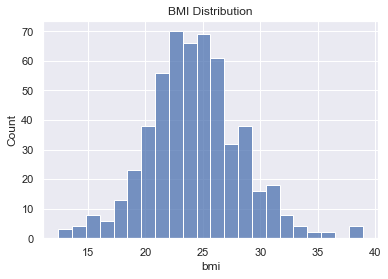

In [25]:
#bmi and pcos
sns.histplot(x = "bmi", data = lstly)
plt.title("BMI Distribution")

In [37]:
pcos_clean["bmi"]

0.2691146680443905

* Distribution of bmi is approimately normal.
* Majority of individuals in the sample have normal bmi.

Text(0.5, 1.0, 'BMI and PCOS')

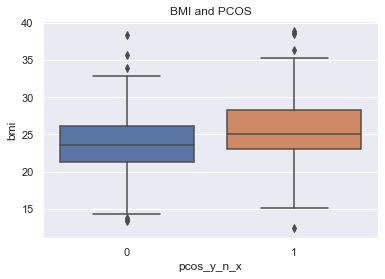

In [26]:
sns.boxplot(data = lstly, x = "pcos_y_n_x", y = "bmi")
plt.title("BMI and PCOS")

* On average, the BMI of individuals with pcos is higher than that of those who do not have pcos.
* We have both overweight and underweight individuals for both the categories with individuals with no pcos having a higher margin.

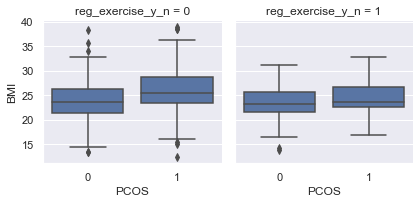

In [27]:
g2 = sns.FacetGrid(lstly, col = "reg_exercise_y_n",margin_titles=True)
g2.map(sns.boxplot, "pcos_y_n_x", "bmi", order = [0,1])
g2.set_axis_labels("PCOS", "BMI")

* On Average, the BMI of individuals who exercise regularly is lower then than of customers who do not exercise regularly

#### Secondary

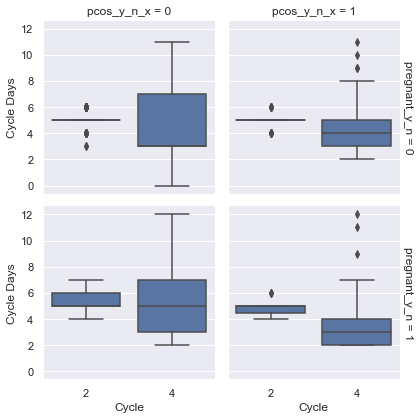

In [29]:
g3 = sns.FacetGrid(sec_stmp, col = "pcos_y_n_x", row = "pregnant_y_n",margin_titles=True)
g3.map(sns.boxplot, "cycle_r_i", "cycle_length_days",order = [2,4])
g3.set_axis_labels("Cycle","Cycle Days")

In [30]:
sec_stmp.columns

Index(['cycle_r_i', 'cycle_length_days', 'pregnant_y_n', 'waist_hip_ratio',
       'hair_growth_y_n', 'skin_darkening_y_n', 'hair_loss_y_n', 'pimples_y_n',
       'pcos_y_n_x'],
      dtype='object')

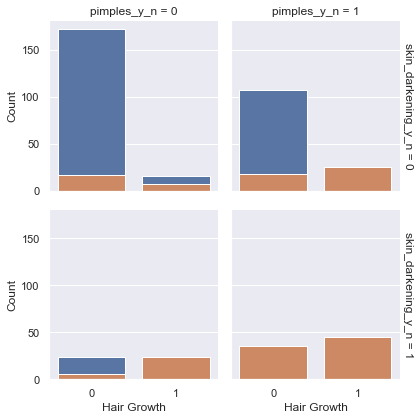

In [31]:
g4 = sns.FacetGrid(sec_stmp, col = "pimples_y_n", row = "skin_darkening_y_n", hue = "pcos_y_n_x",margin_titles=True)
g4.map(sns.countplot,"hair_growth_y_n",order = [0,1])
g4.set_axis_labels("Hair Growth","Count")

#### Primary Symptoms

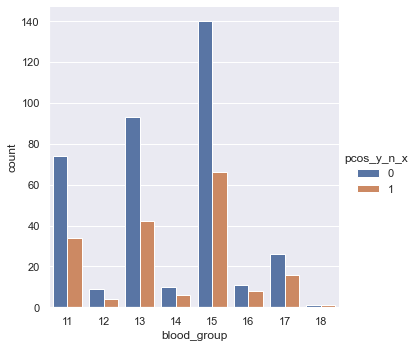

In [32]:
sns.catplot(data = prmy_stmp, x = "blood_group", hue = "pcos_y_n_x", kind = "count")

In [33]:
prmy_stmp.columns

Index(['blood_group', 'i_beta_hcg_m_iu_m_l_x', 'ii_beta_hcg_m_iu_m_l_x',
       'fsh_lh', 'tsh_m_iu_l', 'amh_ng_m_l_x', 'prl_ng_m_l', 'vit_d_3_ng_m_l',
       'prg_ng_m_l', 'rbs_mg_dl', 'bp_systolic_mm_hg', 'bp_diastolic_mm_hg',
       'follicle_no_l', 'follicle_no_r', 'avg_f_size_l_mm', 'avg_f_size_r_mm',
       'endometrium_mm', 'pcos_y_n_x'],
      dtype='object')

In [34]:
prmy_stmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   blood_group             541 non-null    category
 1   i_beta_hcg_m_iu_m_l_x   541 non-null    float64 
 2   ii_beta_hcg_m_iu_m_l_x  541 non-null    object  
 3   fsh_lh                  541 non-null    float64 
 4   tsh_m_iu_l              541 non-null    float64 
 5   amh_ng_m_l_x            541 non-null    object  
 6   prl_ng_m_l              541 non-null    float64 
 7   vit_d_3_ng_m_l          541 non-null    float64 
 8   prg_ng_m_l              541 non-null    float64 
 9   rbs_mg_dl               541 non-null    float64 
 10  bp_systolic_mm_hg       541 non-null    int64   
 11  bp_diastolic_mm_hg      541 non-null    int64   
 12  follicle_no_l           541 non-null    int64   
 13  follicle_no_r           541 non-null    int64   
 14  avg_f_size_l_mm         54

ValueError: could not convert string to float: '1.99.'

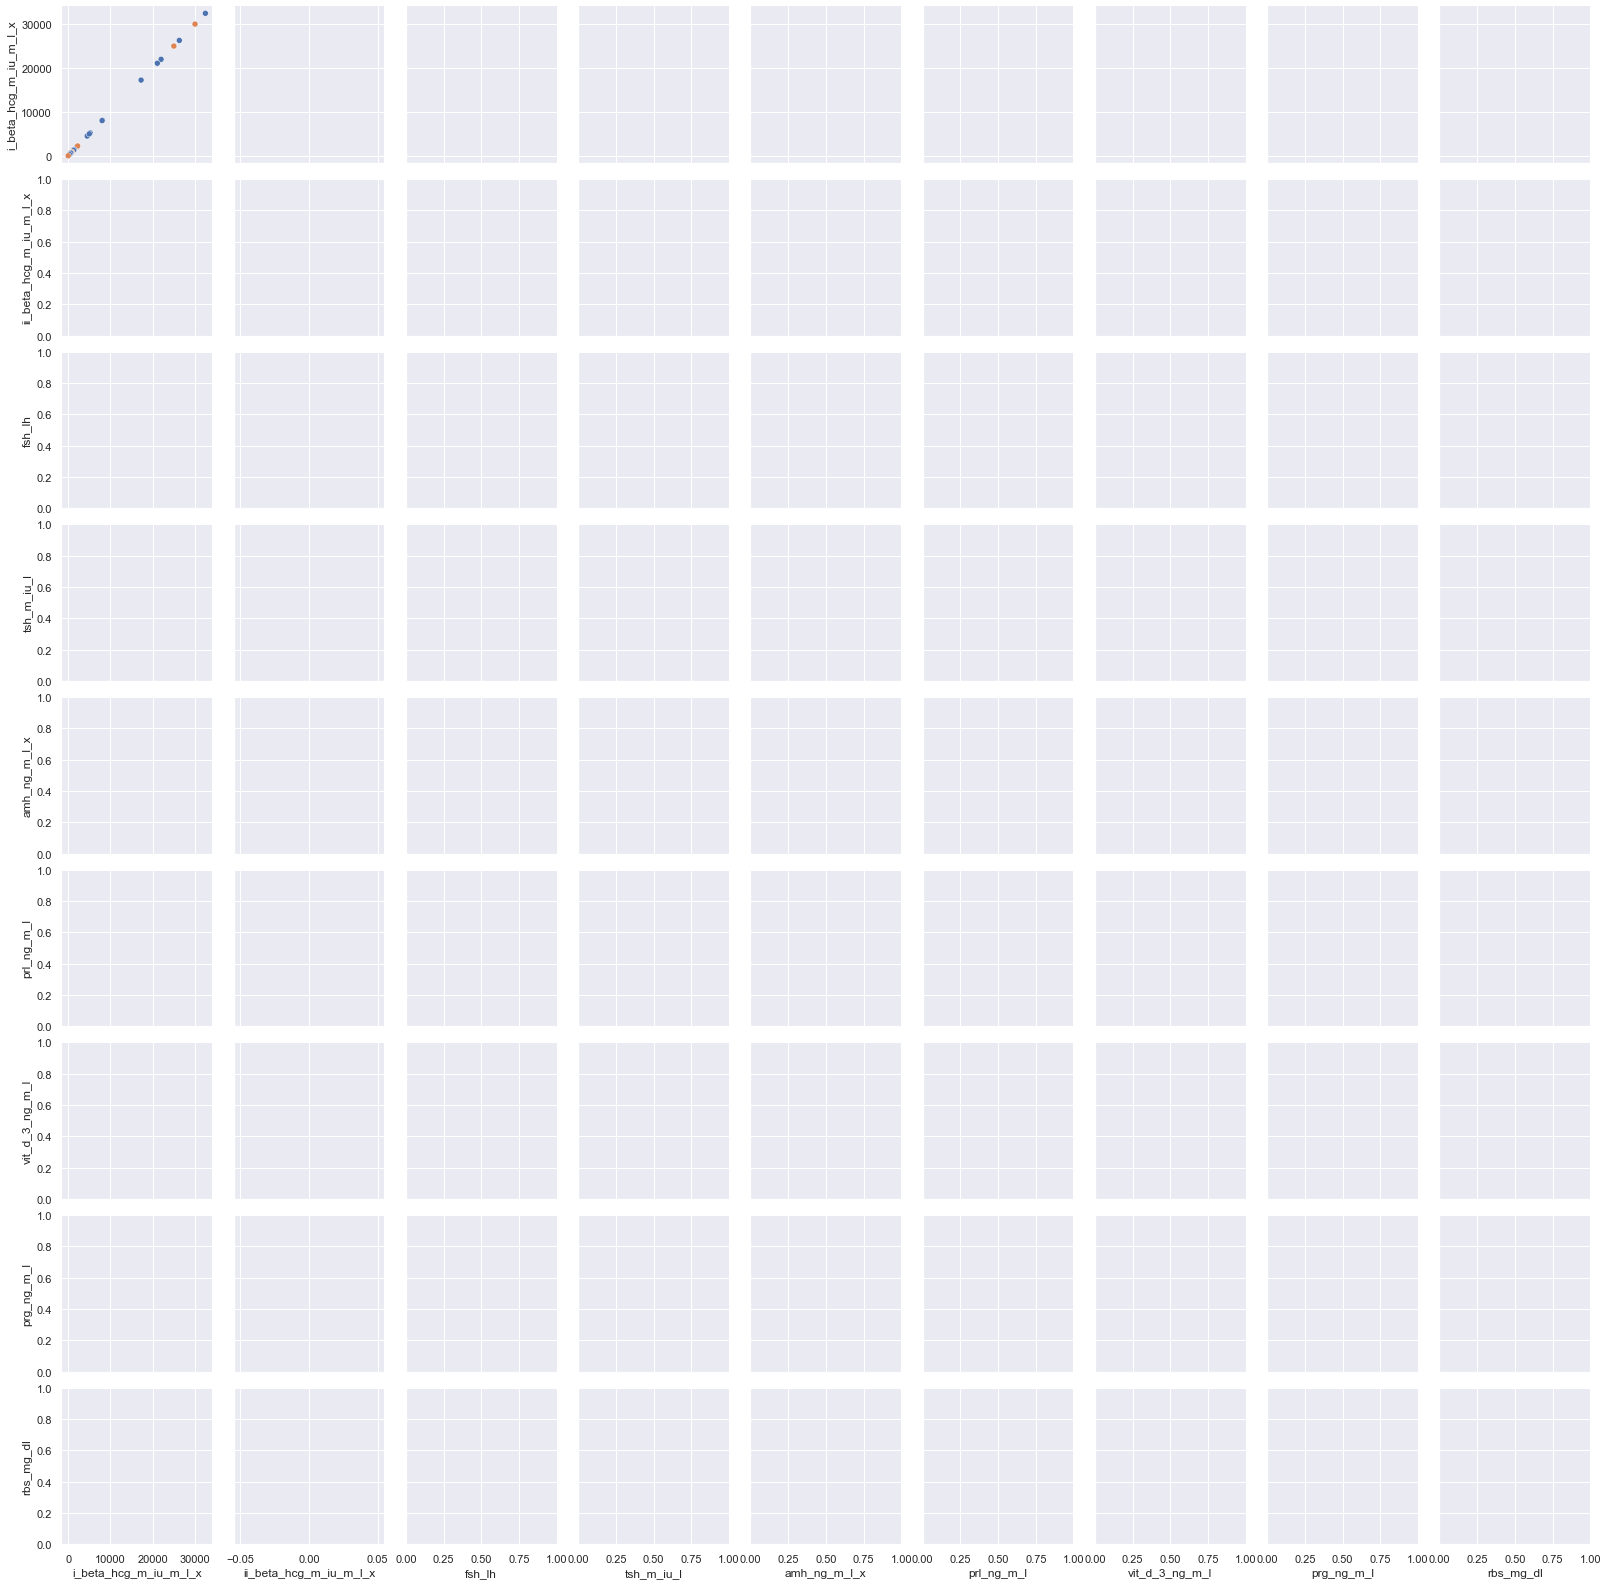

In [35]:
g5 = sns.PairGrid(prmy_stmp, vars=['i_beta_hcg_m_iu_m_l_x', 'ii_beta_hcg_m_iu_m_l_x','fsh_lh', 'tsh_m_iu_l', 
                    'amh_ng_m_l_x', 'prl_ng_m_l', 'vit_d_3_ng_m_l','prg_ng_m_l', 'rbs_mg_dl'], hue = "pcos_y_n_x")
g5.map(sns.scatterplot)                    